In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr, gaussian_kde
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import NMF, PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
sns.set_palette('coolwarm')

# 读取源文件
raw_dataset = pd.read_csv("CW_Data.csv")
# print(rawDataset)

# # 原始dataframe
# raw_df = pd.DataFrame(raw_dataset)
# 仅包含label
raw_programme = pd.DataFrame(raw_dataset.iloc[:, 3])
# 去除index
raw_dataframe = pd.DataFrame(raw_dataset.iloc[:, 1:11])

# 去除index与Programme
no_label_dataframe = raw_dataset.iloc[:, [1, 3, 4, 5, 6, 7, 8, 9, 10]]
# 使用StandardScaler进行zscore标准化
scaler = StandardScaler()
no_label_df_zscore = scaler.fit_transform(no_label_dataframe)
# 将标准化后的数组转换回DataFrame，并为其分配原始列名
no_label_zscore_column_df = pd.DataFrame(no_label_df_zscore, columns=no_label_dataframe.columns)
X_norm = no_label_zscore_column_df

X = raw_dataframe[['Gender', 'Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]  # Features  
y = raw_dataframe['Programme']  # Target variable  

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 24, 'random_state': 42, 'splitter': 'best'}
              precision    recall  f1-score   support

           1       0.60      0.78      0.68        50
           2       0.15      0.14      0.15        21
           3       0.00      0.00      0.00         5
           4       0.59      0.48      0.53        48

    accuracy                           0.52       124
   macro avg       0.33      0.35      0.34       124
weighted avg       0.50      0.52      0.50       124


D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


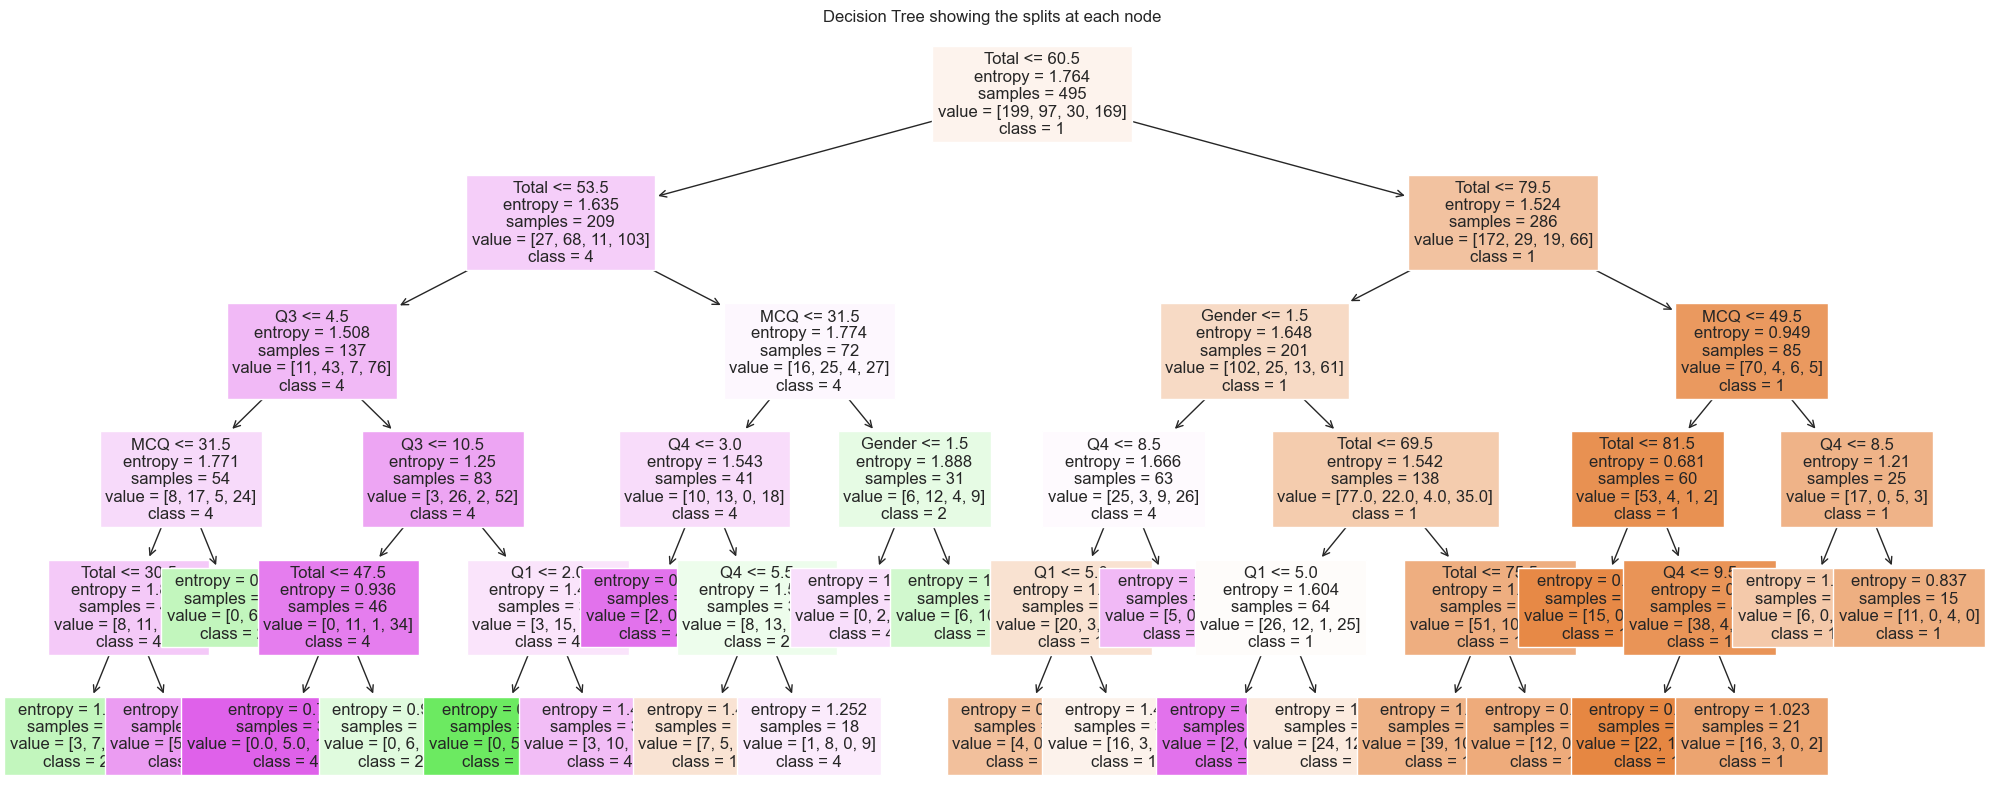

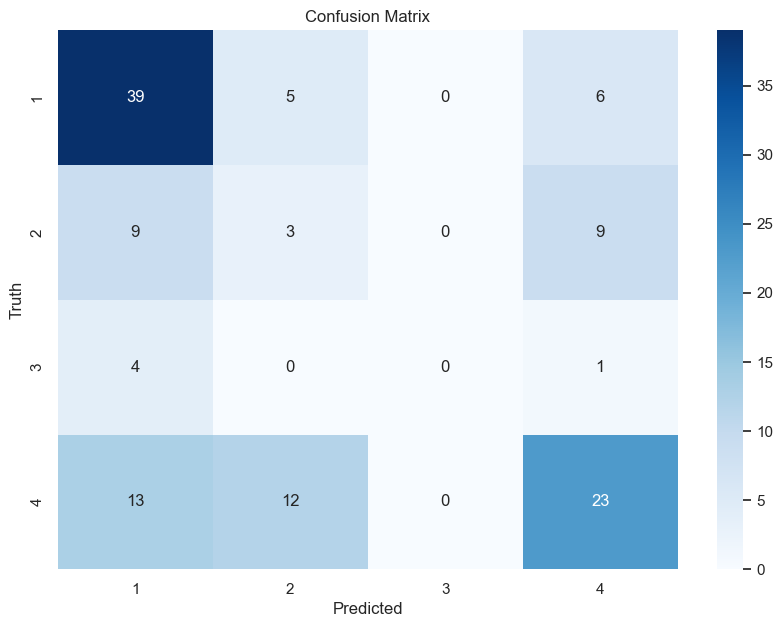

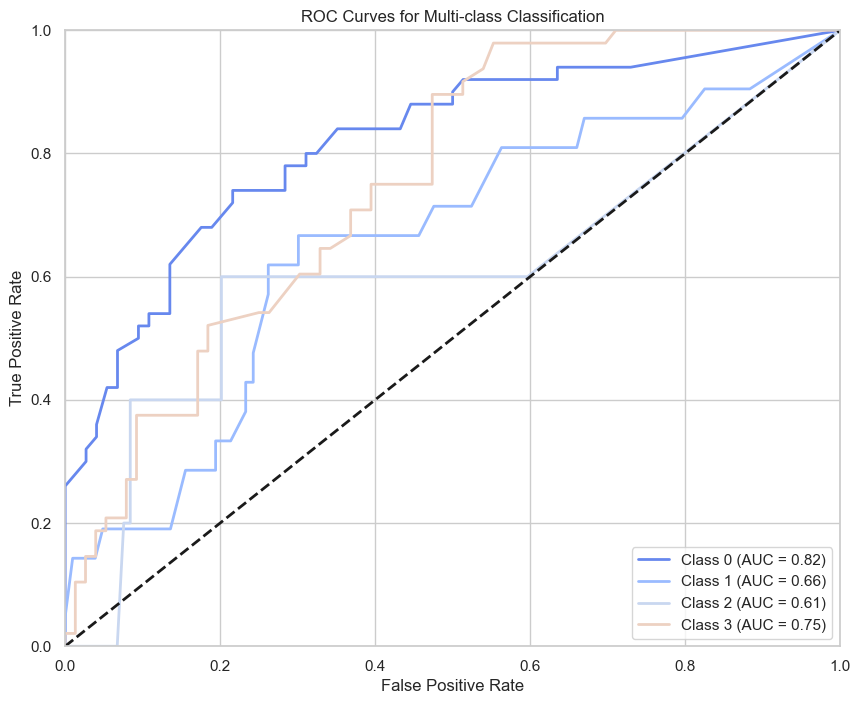

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, f1_score, classification_report


# 决策树分类器
# 分离特征和目标变量
X = raw_dataframe[['Gender','Total','MCQ','Q1','Q2','Q3','Q4','Q5']]  # 特征
# X = raw_dataframe[['Grade', 'MCQ', 'Q1', 'Q3', 'Q4']]  # 特征
y = raw_dataframe['Programme']  # 目标变量（Programme）

# # 确保X的列名是字符串
# X.columns = X.columns.astype(str)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf2 = DecisionTreeClassifier()

# # 定义要搜索的参数网格  
# param_grid = {  
#     'max_depth': [i for i in range(2, 10, 1)],  
#     'min_samples_split': [i for i in range(1, 25, 2)],  
#     'min_samples_leaf': [i for i in range(1, 20, 1)],  
# }
param_grid = {  
    'max_depth': [5],  
    'criterion': ['entropy'],
    'min_samples_split': [24],  
    'min_samples_leaf': [5],  
    'splitter': ['best'],
    'random_state': [42]
} 

# 创建GridSearchCV实例  
grid_search = GridSearchCV(estimator=clf2, param_grid=param_grid, cv=5, n_jobs=8)  
# 使用GridSearchCV拟合数据  
grid_search.fit(X_train, y_train)  
# 获取最佳参数  
best_params = grid_search.best_params_  
print(f"Best parameters: {best_params}")  

# 获取最佳模型  
best_dt_model = grid_search.best_estimator_  
# 使用最佳模型进行预测  
y_pred = best_dt_model.predict(X_test)  


# 你可以使用 classification_report 来获取一个包含多个指标的详细报告  
report = classification_report(y_test, y_pred)  
print(report)


# 可视化决策树
class_names_str = [str(cls) for cls in sorted(y.unique())]  # 将类别转换为字符串
plt.figure(figsize=(25,10))
plot_tree(best_dt_model, filled=True, feature_names=X.columns.tolist(), class_names=class_names_str, fontsize=12)
plt.title('Decision Tree showing the splits at each node')
plt.show()


from sklearn.metrics import confusion_matrix  

# 预测测试集的结果  
y_pred = best_dt_model.predict(X_test)  
# 创建混淆矩阵  
cm = confusion_matrix(y_test, y_pred)  
# 获取类别标签的字符串形式  
class_names_str = [str(cls) for cls in sorted(y.unique())]  

# 可视化混淆矩阵  
plt.figure(figsize=(10, 7))  
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names_str, yticklabels=class_names_str)  
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()


# 绘制ROC曲线
from sklearn.metrics import roc_curve, auc  
from sklearn.preprocessing import label_binarize  
from sklearn.multiclass import OneVsRestClassifier  
import matplotlib.pyplot as plt  
  
# 假设 y_test 是多类别的标签  
n_classes = len(sorted(y.unique()))  
y_test_binary = label_binarize(y_test, classes=sorted(y.unique()))  
# 使用 OneVsRestClassifier 来获取每个类别的预测概率  
ovr = OneVsRestClassifier(best_dt_model)  
y_score = ovr.fit(X_train, y_train).predict_proba(X_test)  
  
# 初始化ROC曲线的绘图  
plt.figure(figsize=(10, 8))  
# 遍历每个类别，并绘制其ROC曲线  
for i in range(n_classes):  
    fpr, tpr, thresholds = roc_curve(y_test_binary[:, i], y_score[:, i])  
    roc_auc = auc(fpr, tpr)  
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')  
  
# 绘制对角线（随机猜测线）  
plt.plot([0, 1], [0, 1], 'k--', lw=2)  
# 设置图例、轴标签和标题  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC Curves for Multi-class Classification')  
plt.legend(loc="lower right")
plt.xlim([0, 1])
plt.ylim([0, 1])
# 显示图形  
plt.show()

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import BaggingClassifier  
from sklearn.metrics import classification_report  
  
# 假设 raw_dataframe 已经被定义并包含你的数据  
X = raw_dataframe[['Gender','Total','MCQ','Q1','Q2','Q3','Q4','Q5']]  # 特征  
y = raw_dataframe['Programme']  # 目标变量（Programme）  
  
# 划分训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
  
# 定义决策树分类器的基础参数（这里只是示例，你可以根据需要调整）  
base_dt = DecisionTreeClassifier(random_state=42)  
  
# 定义 BaggingClassifier 的参数网格  
# 注意：因为 BaggingClassifier 使用 'estimator' 参数，所以不需要 'base_estimator__' 前缀  
param_grid = {    
    'estimator__max_depth': [5],  # 注意这里使用 'estimator__' 前缀  
    'estimator__criterion': ['entropy'],  
    'estimator__min_samples_split': [24],    
    'estimator__min_samples_leaf': [5],    
    'n_estimators': [10, 50, 100],  # BaggingClassifier 的参数  
    'random_state': [42]  
}   
  
# 创建 BaggingClassifier 实例，并将其作为 GridSearchCV 的估计器  
# 将 DecisionTreeClassifier 的实例作为 BaggingClassifier 的 'estimator' 参数  
bagging_clf = BaggingClassifier(estimator=base_dt, random_state=42)  
grid_search = GridSearchCV(estimator=bagging_clf, param_grid=param_grid, cv=5, n_jobs=8)    
  
# 使用 GridSearchCV 拟合数据  
grid_search.fit(X_train, y_train)    
  
# 获取最佳参数  
best_params = grid_search.best_params_    
print(f"Best parameters: {best_params}")    
  
# 获取最佳模型  
best_bagging_model = grid_search.best_estimator_    
  
# 使用最佳模型进行预测  
y_pred = best_bagging_model.predict(X_test)    
  
# 使用 classification_report 来获取一个包含多个指标的详细报告  
report = classification_report(y_test, y_pred)    
print(report)

Best parameters: {'estimator__criterion': 'entropy', 'estimator__max_depth': 5, 'estimator__min_samples_leaf': 5, 'estimator__min_samples_split': 24, 'n_estimators': 10, 'random_state': 42}
              precision    recall  f1-score   support

           1       0.60      0.76      0.67        50
           2       0.25      0.14      0.18        21
           3       0.00      0.00      0.00         5
           4       0.59      0.60      0.60        48

    accuracy                           0.56       124
   macro avg       0.36      0.38      0.36       124
weighted avg       0.51      0.56      0.53       124


D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# svm

Accuracy: 0.6935483870967742
Recall: 0.6704464285714286
F1 Score: 0.6438170525127047
              precision    recall  f1-score   support

           1       0.71      0.78      0.74        50
           2       0.50      0.05      0.09        21
           3       1.00      1.00      1.00         5
           4       0.66      0.85      0.75        48

    accuracy                           0.69       124
   macro avg       0.72      0.67      0.64       124
weighted avg       0.67      0.69      0.64       124


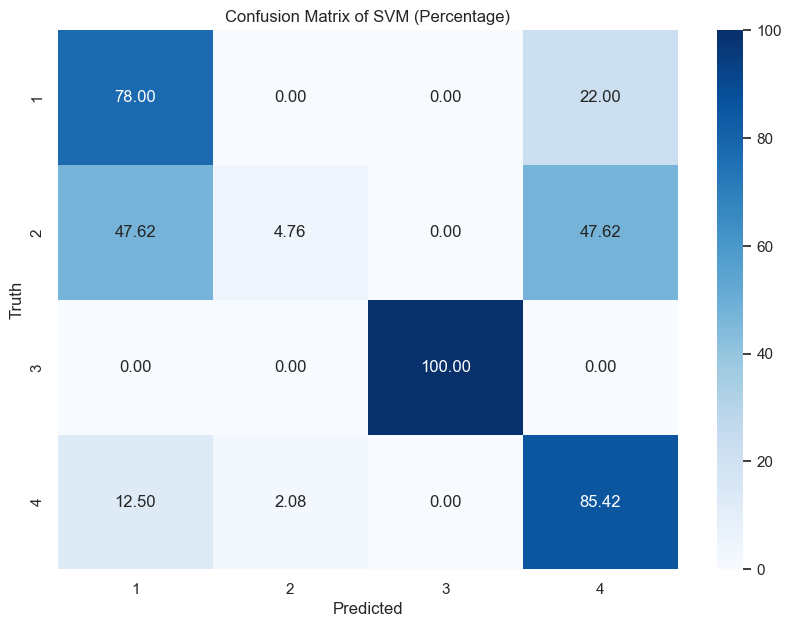

In [32]:
# # SVM前的数据处理
# from sklearn.preprocessing import StandardScaler  
# from sklearn.ensemble import IsolationForest  
# 
# # 去除['MCQ','Q1','Q2','Q3','Q4','Q5']列完全相同的行  
# data_no_g3_drop_duplicates = raw_dataframe.drop_duplicates(subset=['Gender', 'Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5'])  
#   
# # 使用孤立森林检测异常值  
# X_iso = data_no_g3_drop_duplicates.drop('Programme', axis=1)  # 特征变量  
# y_iso = data_no_g3_drop_duplicates['Programme']  # 目标变量  
# iso_clf = IsolationForest(contamination=0.08, random_state=42)  # 去除8%的异常值
# y_iso_pred = iso_clf.fit_predict(X_iso)  
# # 找出异常值的索引，-1表示异常值
# outlier_indices = y_iso_pred == -1
# # 去除异常值的行
# X_clean = X_iso.loc[~outlier_indices]
# y_clean = y_iso.loc[~outlier_indices]
# # 确保X_clean和y_clean的行数相同  
# assert len(X_clean) == len(y_clean), "X_clean and y_clean must have the same number of rows"
# # print(X_clean)
# # print(y_clean)
# data_no_g3_drop_duplicates_cleaned = pd.DataFrame(pd.concat([X_clean, y_clean], axis=1))
# # print(data_no_g3_drop_duplicates_cleaned)
# 
# # 提取除"Programme"列之外的所有特征列  
# X_to_scale = data_no_g3_drop_duplicates_cleaned.drop('Programme', axis=1)  
# # 初始化StandardScaler  
# scaler = StandardScaler()  
# # 对特征进行z-score缩放  
# X_scaled = scaler.fit_transform(X_to_scale)  
# # 将缩放后的特征转换为DataFrame，使用X_to_scale的列名  
# X_scaled_df = pd.DataFrame(X_scaled, columns=X_to_scale.columns)
# X_scaled_df.reset_index(drop=True, inplace=True)  
# data_no_g3_drop_duplicates_cleaned['Programme'].reset_index(drop=True, inplace=True)
# # 重新合并"Programme"列和标准化后的特征列  
# data_no_g3_drop_duplicates_scaled_cleaned = pd.concat([X_scaled_df, data_no_g3_drop_duplicates_cleaned['Programme']], axis=1)
# # print(data_no_g3_drop_duplicates_scaled_cleaned)

# 使用不同配置的svm进行分类
from sklearn import svm  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.metrics import accuracy_score  
  
# 分离特征和目标变量
X = X_norm  # 特征
y = y  # 目标变量（Programme）

# 确保X的列名是字符串
X.columns = X.columns.astype(str)
  
# 将数据分为训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)  

from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier
# Step 3: Undersample majority class
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

# 设置SVM的参数网格  [100, 10, 1, 0.1, 0.001, 0.0001]

# parameter_space = {
#     'C': [100, 10, 1, 0.1, 0.001, 0.0001],  # 误分类的惩罚参数  
#     'gamma': ['scale'],  # 对于'rbf', 'poly' 和 'sigmoid'  
#     'kernel': ['rbf', 'poly','sigmoid']  # 核函数类型  
# }

parameter_space = {
    'C': [0.1, 1, 10,50],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Specifies the kernel type to be used in the algorithm
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf'
}

# 创建SVM分类器对象  
svc = svm.SVC() 

# 创建SVM分类器对象  
clf_svm_gs = GridSearchCV(svc, parameter_space, cv=5, n_jobs=8)  # 使用5折交叉验证
  
# 训练模型并搜索最佳参数
clf_svm_gs.fit(X_train, y_train)

clf_svm_best = clf_svm_gs.best_estimator_

# # 打印最佳参数  
# print("Best parameters set found on development set:")  
# print()  
# print(clf_svm_best.best_params_)  
# print()  
# print("Grid scores on development set:")  
# print()  
# means = clf_svm_best.cv_results_['mean_test_score']  
# stds = clf_svm_best.cv_results_['std_test_score']  
# for mean, std, params in zip(means, stds, clf_svm_best.cv_results_['params']):  
#     print("%0.3f (+/-%0.03f) for %r"  
#           % (mean, std * 2, params))  
# print()  


# 使用最佳参数在测试集上进行预测  
y_pred = clf_svm_best.predict(X_test)  
  
# 计算准确度  
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# 计算召回率  
# 注意：recall_score 需要一个额外的参数 'average'，指定如何计算多分类问题的召回率  
# 例如，可以使用 'micro', 'macro', 'weighted' 或针对每个类别的列表/数组  
recall = recall_score(y_test, y_pred, average='macro')  # 假设你想要计算宏平均召回率  
print(f"Recall: {recall}")
# 计算 F1 分数  
# 同样，f1_score 也需要一个 'average' 参数  
f1 = f1_score(y_test, y_pred, average='macro')  # 假设你想要计算宏平均 F1 分数  
print(f"F1 Score: {f1}")
# 或者，你可以使用 classification_report 来获取一个包含多个指标的详细报告  
report = classification_report(y_test, y_pred)  
print(report)

# # 获取所有唯一的类标签，并将它们转换为字符串（如果它们不是字符串的话）
# class_labels = y.unique().astype(str)


import numpy as np  
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt  
import seaborn as sns  
  
# 假设你已经有了 y_test, y_pred, 并且 clf3 和 X_test 已经用于预测  
  
# 预测测试集的结果  
y_pred = clf_svm_best.predict(X_test)  
# 创建混淆矩阵  
cm = confusion_matrix(y_test, y_pred)  
# 获取类别标签的字符串形式  
class_names_str = [str(cls) for cls in sorted(y.unique())]  
  
# 计算每行的总和（也可以是每列的总和，取决于你想要展示哪种百分比）  
row_sums = cm.sum(axis=1, keepdims=True)  
# 避免除以零错误  
row_sums[row_sums == 0] = 1  
  
# 计算百分比并四舍五入到小数点后两位  
cm_percentage = (cm / row_sums) * 100  
cm_percentage = np.round(cm_percentage, 2)  
  
# 可视化混淆矩阵（百分比形式）  
plt.figure(figsize=(10, 7))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names_str, yticklabels=class_names_str)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix of SVM (Percentage)')  
plt.show()

In [15]:
# 1. 导入必要的库
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import pandas as pd

# 2. 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {
    'C': [0.1, 1, 10, 100],  # 正则化参数C的候选值
    'kernel': ['linear', 'rbf', 'poly'],  # 核函数的候选值
    'gamma': ['scale', 'auto'],  # gamma参数的候选值
    # 'decision_function_shape' : ['ovo'],
}

# 初始化GridSearchCV对象
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
# 使用训练数据进行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数组合
print("Best Parameters:", grid_search.best_params_)
# 获取最佳模型
best_model = grid_search.best_estimator_
# 使用最佳模型对测试集进行预测
y_pred = best_model.predict(X_test)

# 输出混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True 1', 'True 2', 'True 3', 'True 4'], 
                              columns=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'])
print("Confusion Matrix:")
print(conf_matrix_df)

print(report)


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Confusion Matrix:
        Predicted 1  Predicted 2  Predicted 3  Predicted 4
True 1           39            0            0           11
True 2           10            1            0           10
True 3            0            0            5            0
True 4            6            1            0           41
              precision    recall  f1-score   support

           1       0.61      0.67      0.63        69
           2       0.29      0.24      0.26        33
           3       1.00      1.00      1.00         6
           4       0.44      0.42      0.43        57

    accuracy                           0.51       165
   macro avg       0.58      0.58      0.58       165
weighted avg       0.50      0.51      0.50       165
